In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp
from sklearn.preprocessing  import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_regression
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [153]:
def difference(dataset, interval=1):
    data = dataset.values.flatten()
    diff = list()
    for i in range(interval, len(dataset)):
        value = data[i] - data[i - interval]
        diff.append(value)
    index = dataset.index[interval:len(dataset)]
    return pd.DataFrame(data=diff,index=index,columns=[dataset.columns[0]])

def inverse_difference(original, diff):
    data_diff = diff.values.flatten()
    data_original = original.values.flatten()
    inverted = [(data_original[i] + data_diff[i]) for i in range(len(data_diff))]
    return pd.DataFrame(data=inverted,index=diff.index,columns=diff.columns)

In [167]:
colunas = 'DEC'
caminhoArquivo = 'DECFEC_light_2000_2017.csv'
dataSet = pd.read_csv(caminhoArquivo)
# mes_normalizado = np.array([float(i.split("-")[1])/12 for i in dataSet.index])
dataSet['Data'] = pd.to_datetime(dataSet["Data"])
dataSet = dataSet.set_index(["Data"])
if colunas is not None:
    dataSet = dataSet[colunas]
dataSet = pd.DataFrame(data=dataSet,index=dataSet.index,columns=['DEC'])
# dataSet = dataSet.set_axis(["DEC"], axis=1, inplace=False)

Text(0.5,1,'Serie reconstruída')

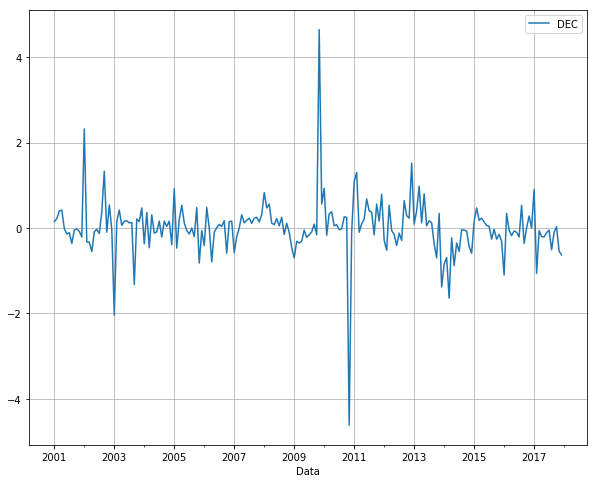

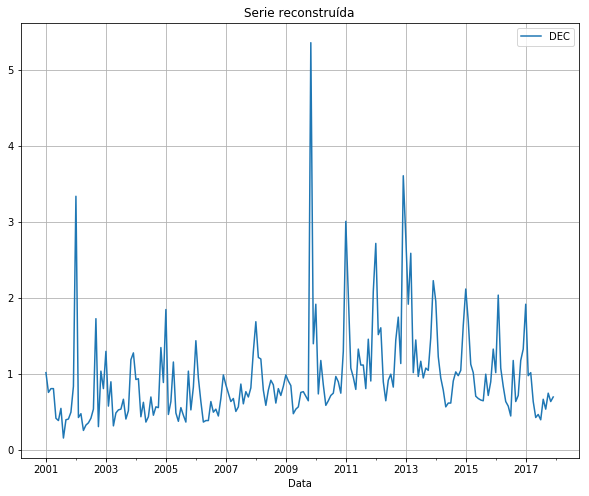

In [169]:
ds_sem_sazonalidade =  difference(dataSet,interval=12)
ax = ds_sem_sazonalidade.plot(figsize=(10,8),grid=True)
# plt.title('Serie dessazonalizada mensalmente')
# plt.show()
# print(ds_sem_sazonalidade)

ds_sem_tendencia = difference(dataSet,interval=1)
# ds_sem_tendencia.plot(figsize=(10,8),grid=True,y=["DEC"])
# plt.title('Serie com tendência removida')
# plt.show()
# print(ds_sem_tendencia)

ds_reconstruido = inverse_difference(dataSet,ds_sem_sazonalidade)
ds_reconstruido.plot(figsize=(10,8),grid=True,y=["DEC"])
plt.title('Serie reconstruída')
# plt.show()